In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import metrics
import time
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/bishnurijal/Downloads/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [7]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    0.998273
1    0.001727
Name: Class, dtype: float64


<Axes: ylabel='Class'>

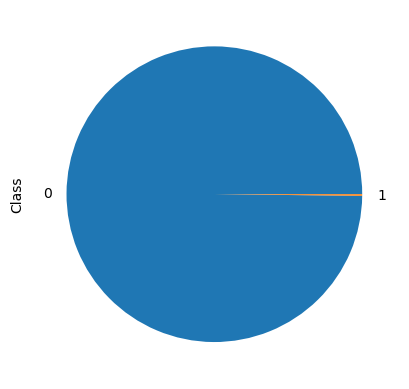

In [13]:
print(df.groupby("Class")["Class"].count()/df["Class"].count())
(df.groupby("Class")["Class"].count()/df["Class"].count()).plot.pie()

In [15]:
classes = df["Class"].value_counts()
non_fraud = classes[0]/df["Class"].count() * 100
fraud = classes[1]/df["Class"].count() * 100
print(non_fraud)
print(fraud)

99.82725143693798
0.1727485630620034


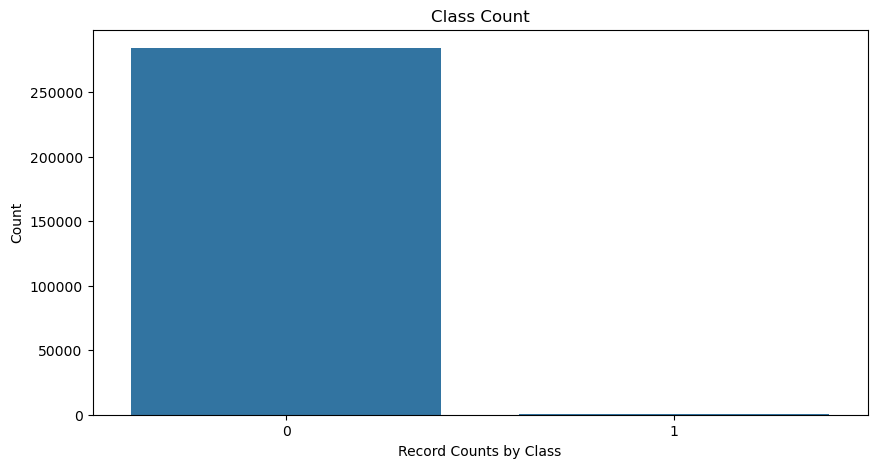

In [17]:
class_counts = df["Class"].value_counts().reset_index()
class_counts.columns = ["Class", "Count"]

# Plot using the pre-aggregated data
plt.figure(figsize=(10, 5))
sns.barplot(x="Class", y="Count", data=class_counts)
plt.title("Class Count")
plt.xlabel("Record Counts by Class")
plt.ylabel("Count")
plt.show()

In [19]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.188326e-16,-1.164018e-15,-9.082889e-16,2.085924e-17,-6.343731e-16,-1.018099e-15,-2.557889e-16,-1.347621e-16,...,-2.444306e-16,-4.201199e-16,6.217312e-16,-4.385333e-17,-9.832396e-16,-1.745526e-17,1.196577e-16,2.108702e-15,-0.227709,-0.101347
V2,-0.010593,4.188326e-16,1.000000e+00,3.140164e-16,-1.125909e-15,5.230686e-16,2.781752e-16,1.857398e-16,-5.698764e-17,2.006267e-17,...,-8.277282e-17,1.547272e-16,1.668081e-16,1.577058e-17,-4.530958e-16,1.984817e-16,-4.938067e-16,-5.182198e-16,-0.531409,0.091289
V3,-0.419618,-1.164018e-15,3.140164e-16,1.000000e+00,4.644369e-16,-5.483554e-17,1.627805e-15,5.239200e-16,-1.297365e-15,5.725902e-16,...,5.931009e-17,-1.115726e-15,-5.063673e-16,5.605700e-19,-1.118857e-15,-1.389572e-16,1.058098e-15,9.792787e-16,-0.210880,-0.192961
V4,-0.105260,-9.082889e-16,-1.125909e-15,4.644369e-16,1.000000e+00,-1.722056e-15,-7.565957e-16,-4.188169e-16,5.645256e-16,6.873528e-16,...,-1.862123e-16,-3.949686e-17,9.564529e-17,1.569977e-16,6.026069e-16,-4.237973e-16,4.577343e-17,-3.888959e-18,0.098732,0.133447
V5,0.173072,2.085924e-17,5.230686e-16,-5.483554e-17,-1.722056e-15,1.000000e+00,2.208263e-16,2.691713e-16,7.396815e-16,7.178142e-16,...,-3.990893e-16,1.277735e-16,-8.760100e-18,-1.142295e-15,5.021165e-16,4.450164e-16,6.538203e-16,-3.301835e-18,-0.386356,-0.094974
V6,-0.063016,-6.343731e-16,2.781752e-16,1.627805e-15,-7.565957e-16,2.208263e-16,1.000000e+00,1.213776e-16,-1.030439e-16,4.234240e-16,...,5.551919e-17,5.756004e-18,9.443837e-17,-1.070899e-15,4.568884e-16,-1.402561e-16,-4.500879e-16,2.493919e-16,0.215981,-0.043643
V7,0.084714,-1.018099e-15,1.857398e-16,5.239200e-16,-4.188169e-16,2.691713e-16,1.213776e-16,1.000000e+00,3.549393e-16,1.125386e-15,...,-2.122235e-16,-8.840620e-16,-4.458969e-16,9.812896e-18,-2.881866e-16,-9.494990e-16,-1.723845e-15,-2.921030e-16,0.397311,-0.187257
V8,-0.036949,-2.557889e-16,-5.698764e-17,-1.297365e-15,5.645256e-16,7.396815e-16,-1.030439e-16,3.549393e-16,1.000000e+00,4.340695e-16,...,3.830431e-16,2.065947e-16,6.910016e-17,-9.701203e-17,-4.609097e-16,-1.777597e-16,1.280491e-16,-6.187506e-16,-0.103079,0.019875
V9,-0.008660,-1.347621e-16,2.006267e-17,5.725902e-16,6.873528e-16,7.178142e-16,4.234240e-16,1.125386e-15,4.340695e-16,1.000000e+00,...,1.874693e-16,-6.976879e-16,-5.221067e-16,-1.449529e-16,6.679328e-16,-8.154251e-16,-6.111140e-17,1.106537e-15,-0.044246,-0.097733


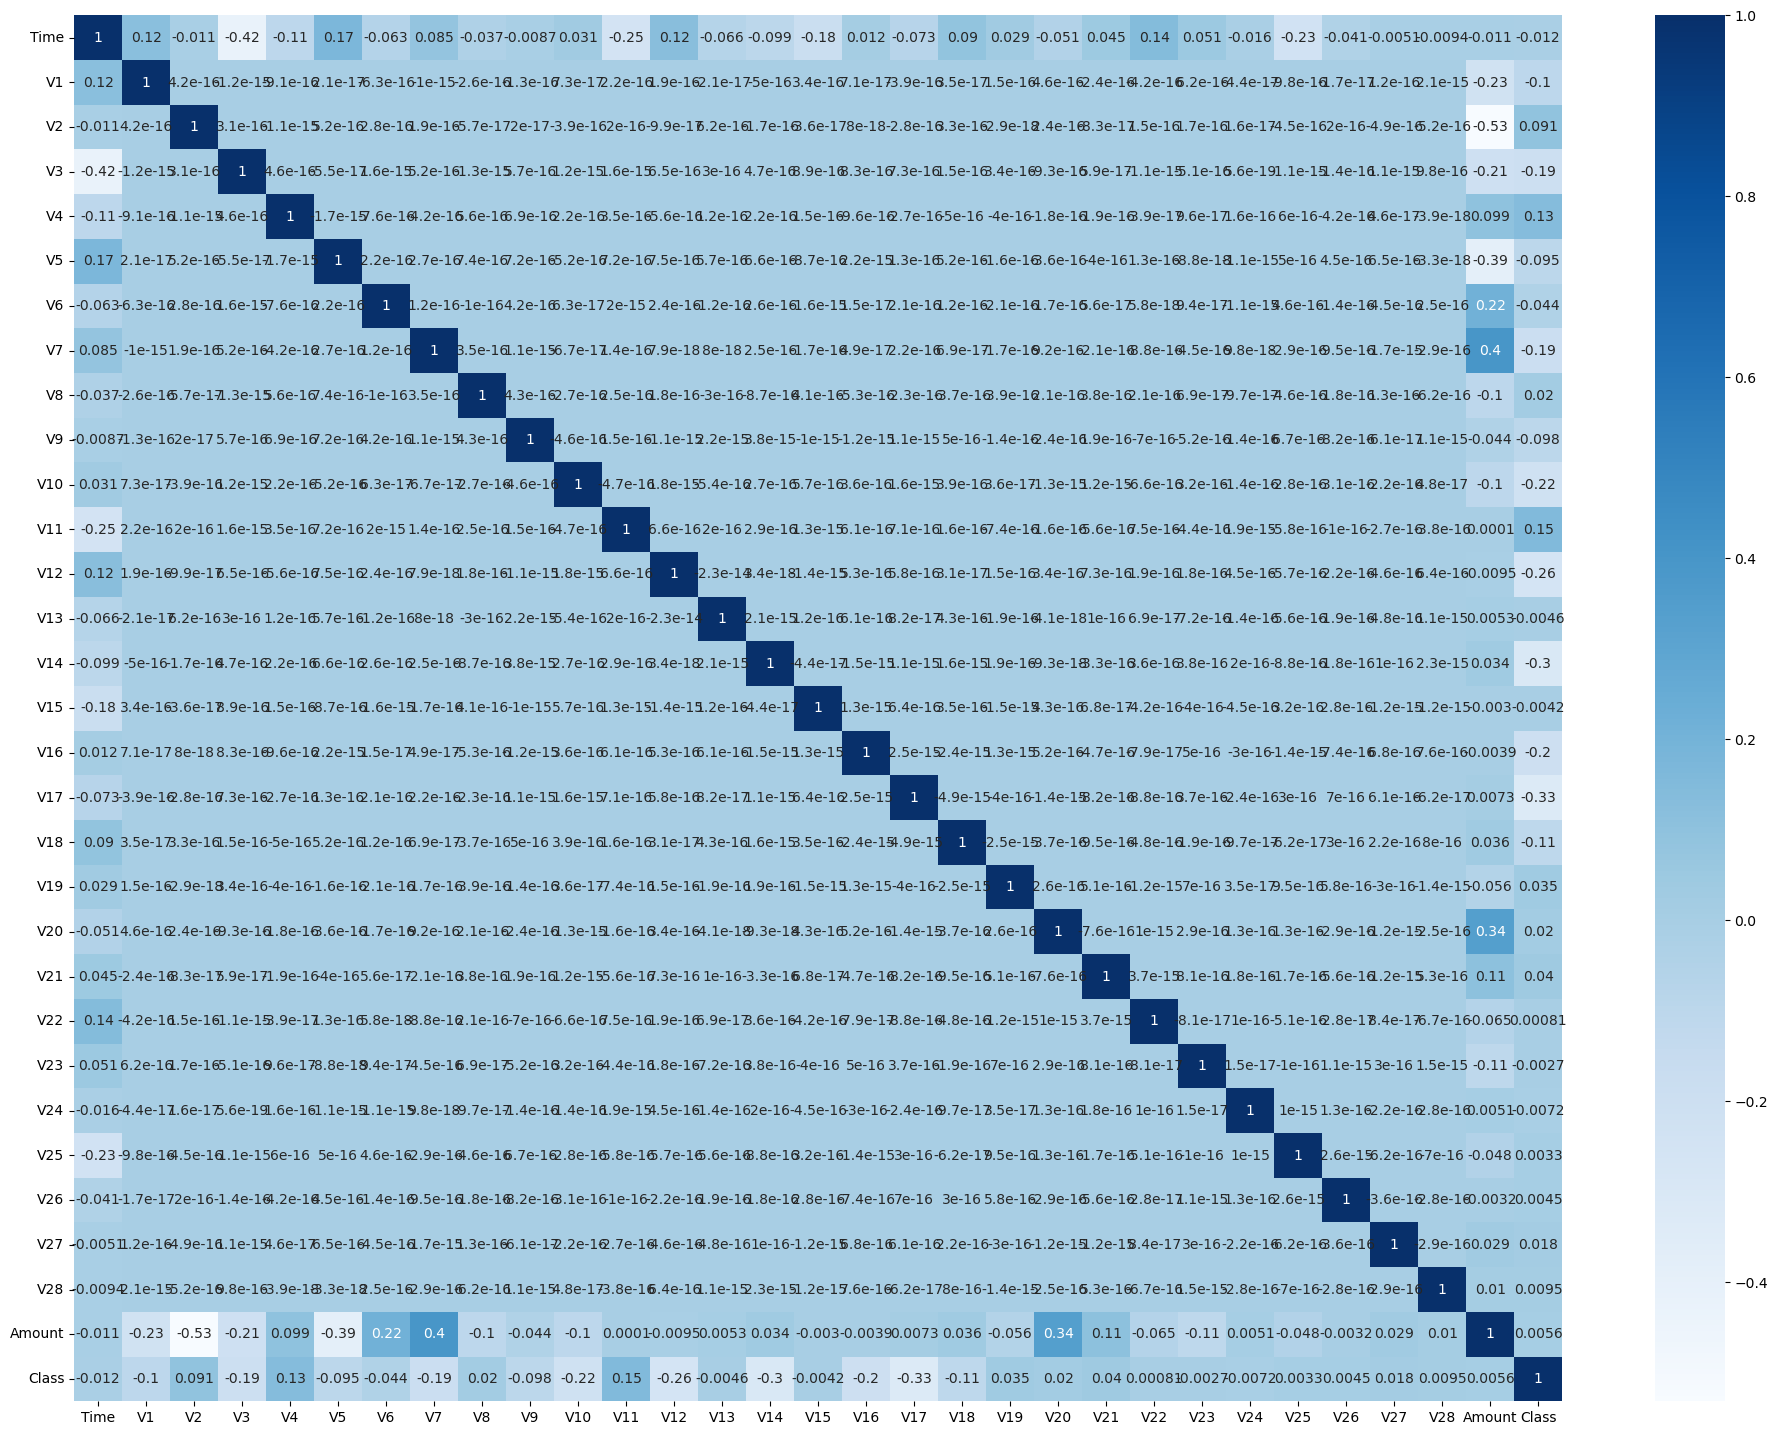

In [21]:
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap="Blues",annot=True)
plt.show()

In [35]:
Delta_time = pd.to_timedelta(df["Time"],unit="s")
df["Time_Day"]=(Delta_time.dt.components.days).astype(int)
df["Time_Hour"]=(Delta_time.dt.components.hours).astype(int)
df["Time_Min"]=(Delta_time.dt.components.minutes).astype(int)

In [37]:
df.drop('Time',axis=1,inplace=True)
df.drop(['Time_Day','Time_Min'],axis=1,inplace=True)

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0


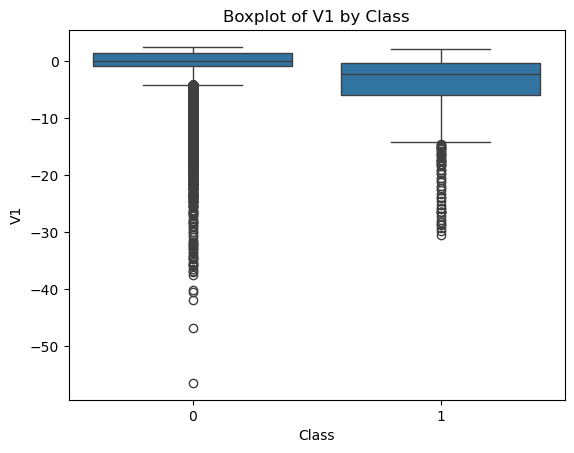

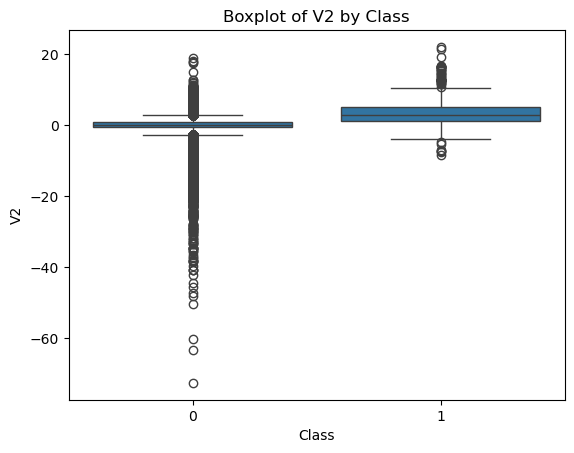

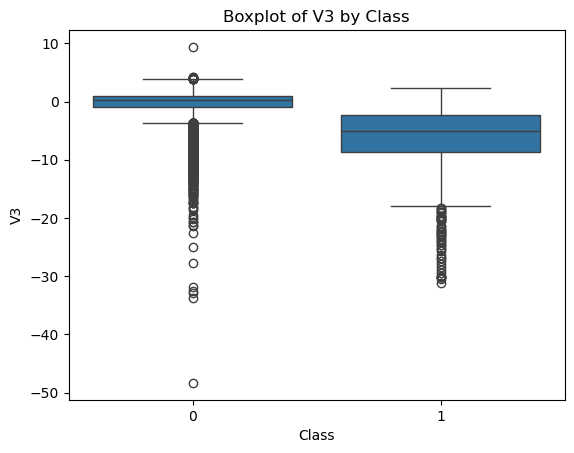

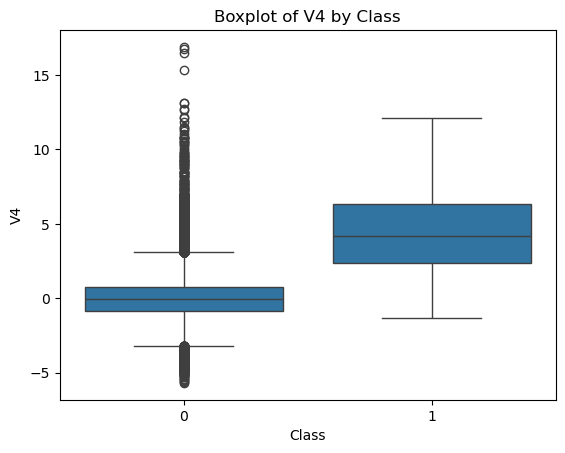

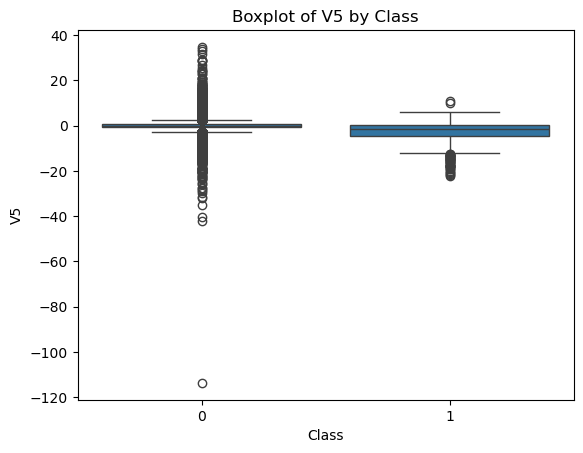

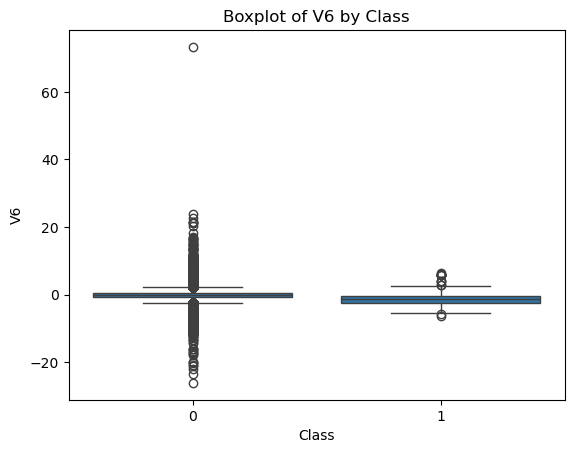

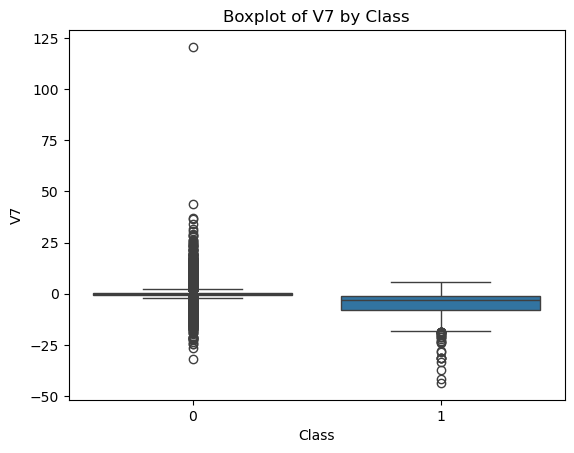

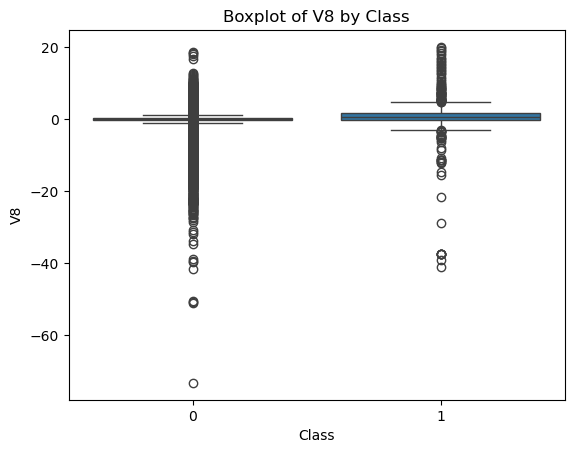

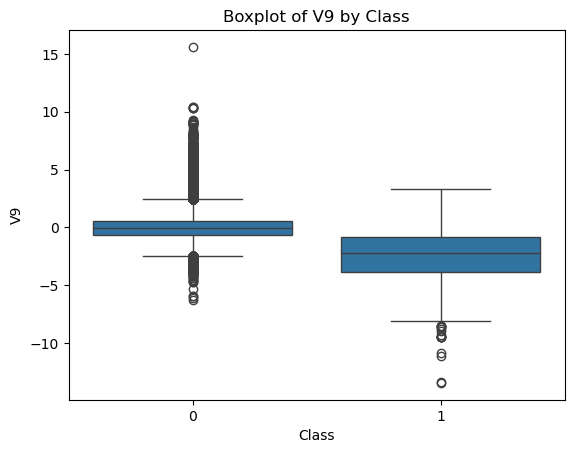

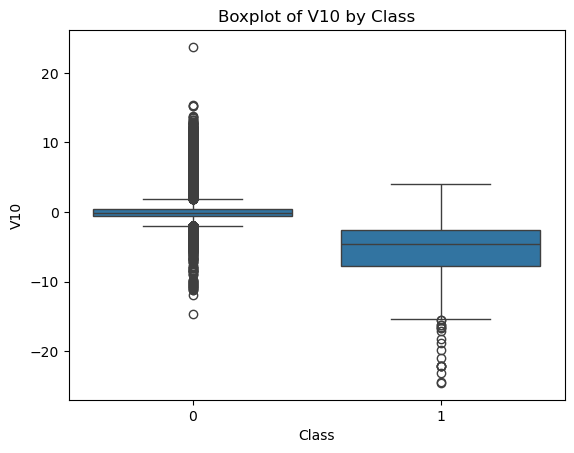

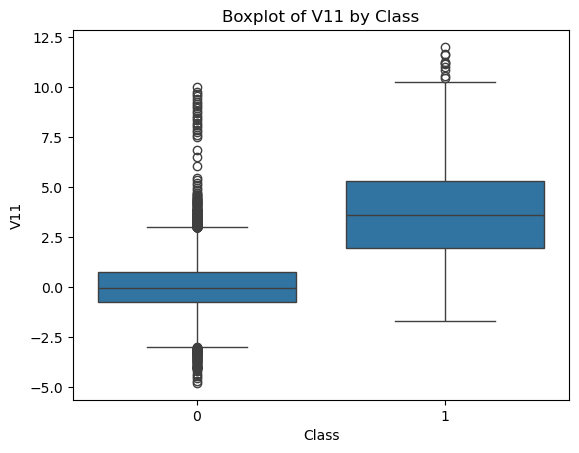

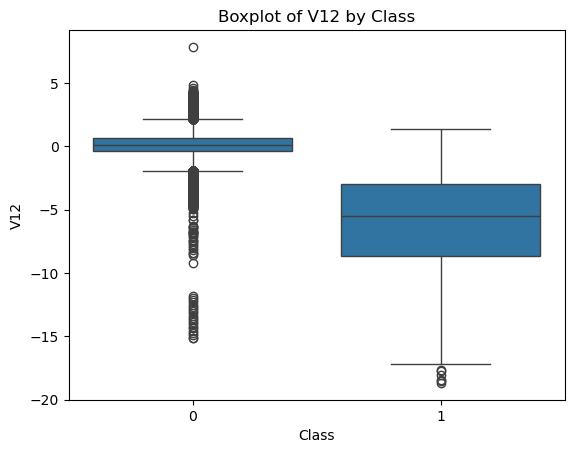

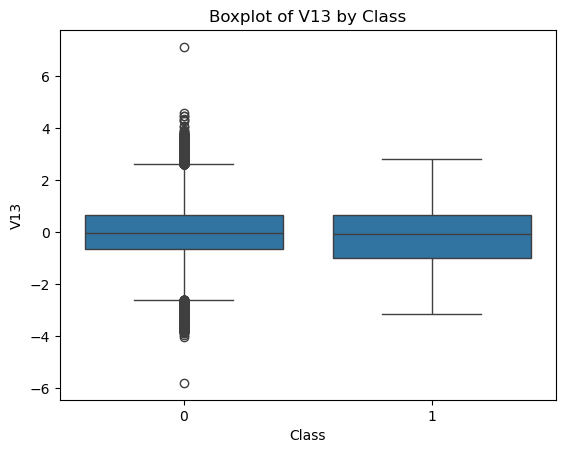

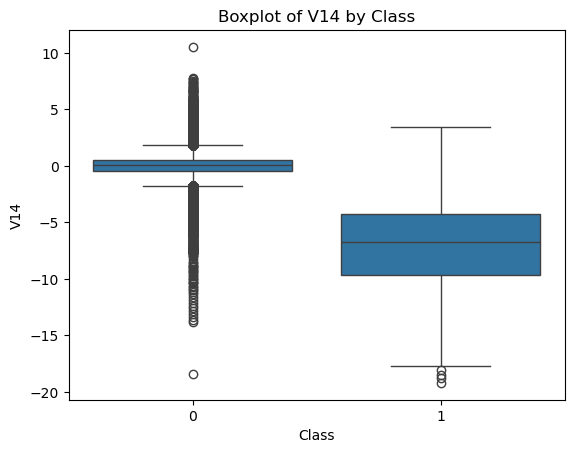

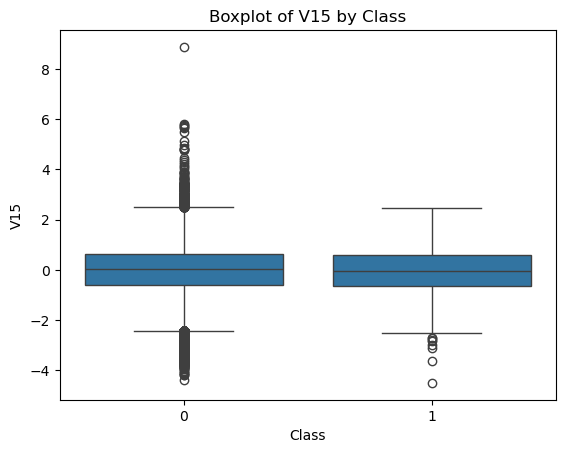

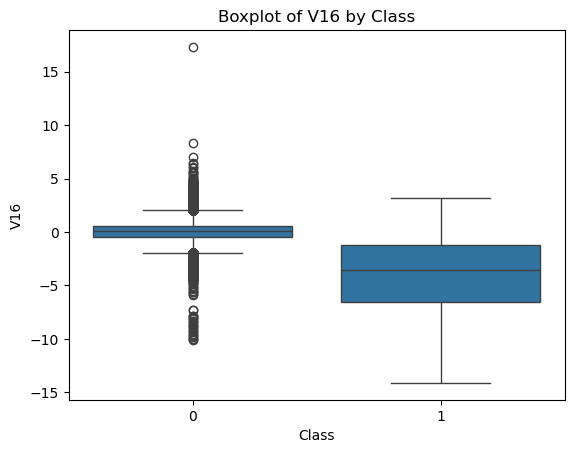

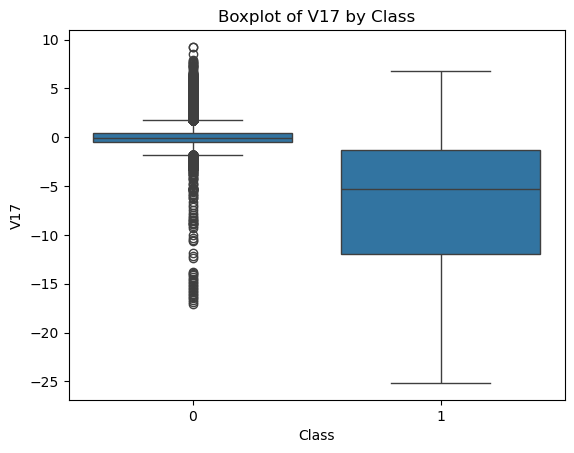

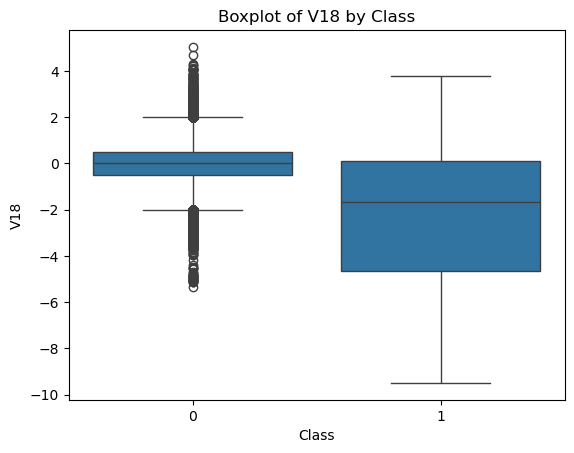

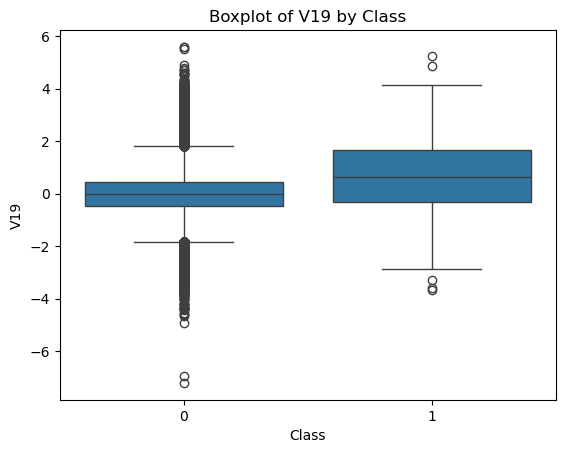

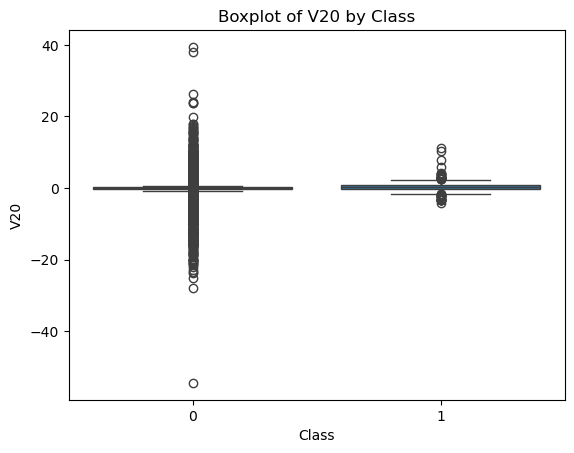

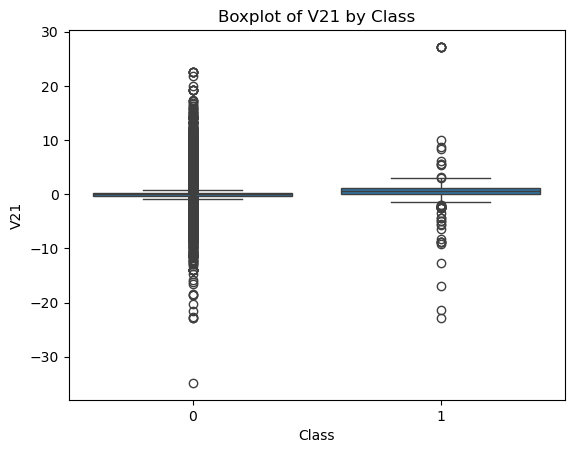

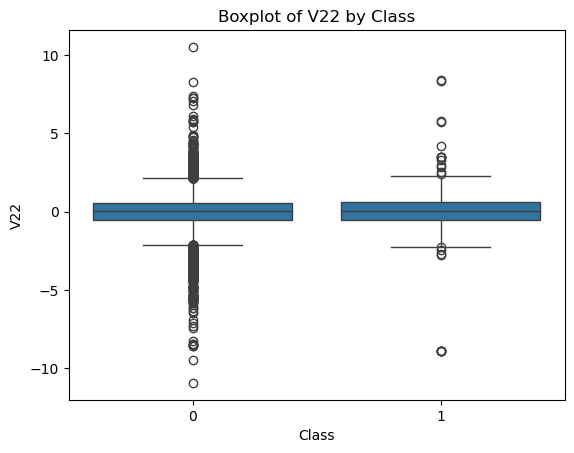

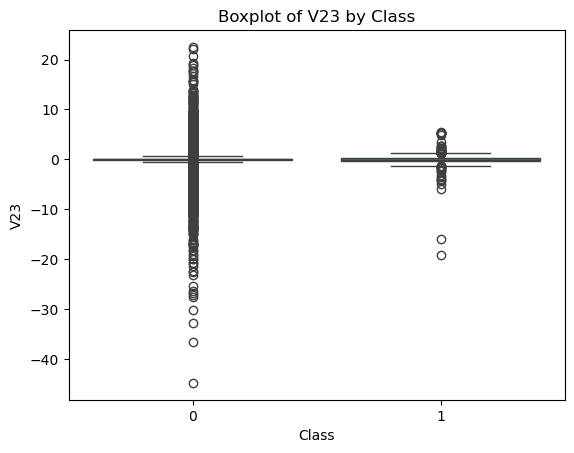

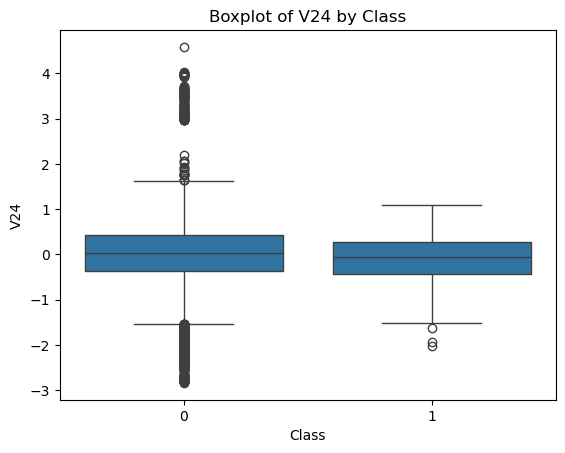

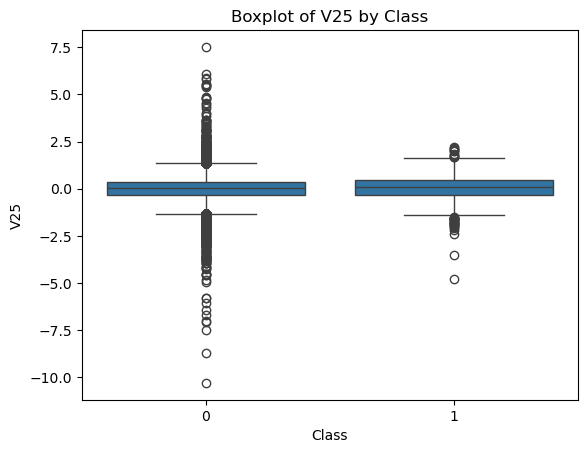

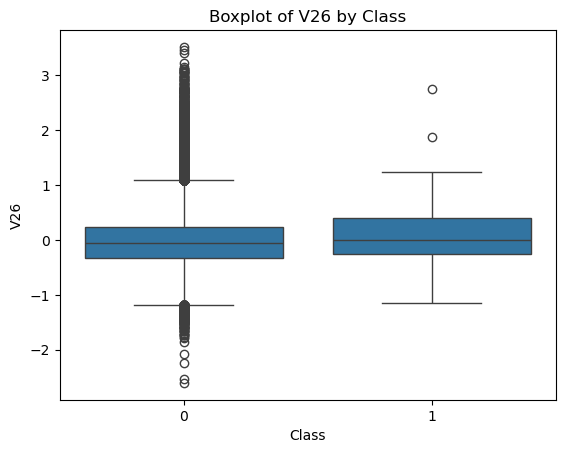

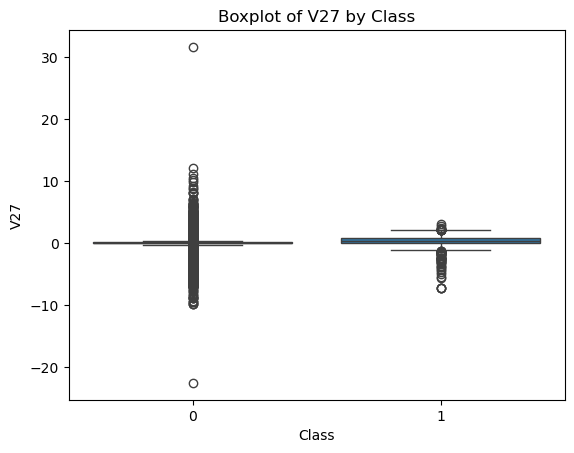

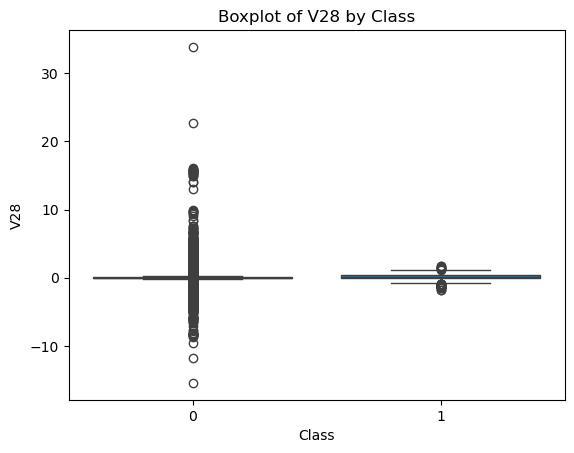

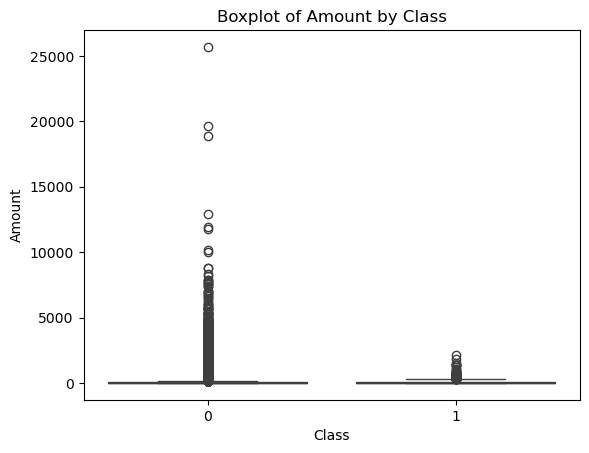

In [41]:
for col in df.columns:
    if col not in ["Class", "Time_Hour"]:
        sns.boxplot(x="Class", y=col, data=df)
        plt.title(f"Boxplot of {col} by Class")
        plt.show()

In [43]:
y = df["Class"]
X= df.drop(["Class"],axis=1)
X.shape,y.shape


((284807, 30), (284807,))

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.20)

In [47]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


In [49]:
#lets put all the features on one variable
cols = list(X.columns.values)


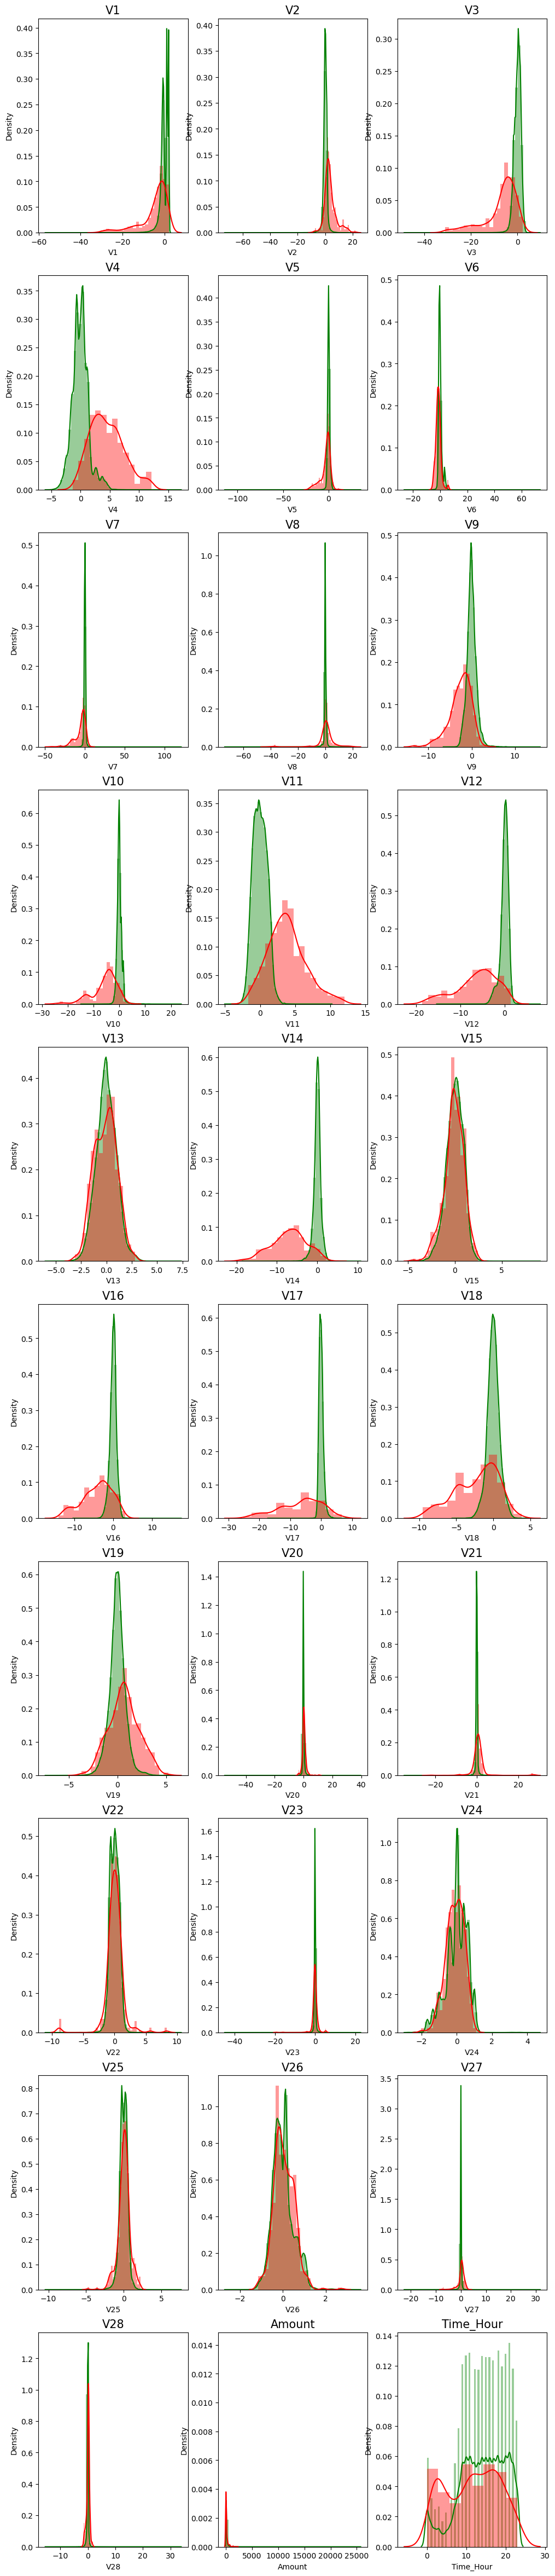

In [51]:
normal_records = df["Class"]==0
fraud_records = df["Class"]==1

plt.figure(figsize=(12,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(X[col][normal_records],color="green",kde=True)
    sns.distplot(X[col][fraud_records],color="red",kde=True)
    plt.title(col,fontsize=15)
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_confusion_matrix(y_test,pred_test):
    cm = confusion_matrix(y_test,pred_test)
    plt.clf()
    plt.imshow(cm,interpolation="nearest",cmap=plt.cm.Accent)
    categoryNames = ["Non-Fraudulent","Fradulent"]
    plt.title("Confusion Matrix- Test Data")
    plt.ylabel("True Label")
    plt.xlabel("predicted label")
    ticks= np.arange(len(categoryNames))
    plt.xticks(ticks,categoryNames,rotation = 45)
    plt.yticks(ticks,categoryNames)
    s = [['TN','FP'],['FN','TP']]

    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{s[i][j]} = {cm[i][j]}", fontsize=12, 
                 horizontalalignment='center', verticalalignment='center')

    plt.show()

In [55]:
df_Results= pd.DataFrame(columns=["Methodology","Model","Accuracy","roc_value","Threshold"])

In [57]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def buildAndRunLogisticModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
    num_C = list(np.power(10.0, np.arange(-10, 10)))  # Regularization strengths
    cv_num = KFold(n_splits=10, shuffle=True, random_state=42)  # Cross-validation strategy
    
    # Logistic Regression with L2 Regularization
    searchCV_l2 = LogisticRegressionCV(
        Cs=num_C,
        penalty='l2',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver="newton-cg",
        tol=10
    )
    
    # Logistic Regression with L1 Regularization
    searchCV_l1 = LogisticRegressionCV(
        Cs=num_C,
        penalty='l1',
        scoring='roc_auc',
        cv=cv_num,
        random_state=42,
        max_iter=10000,
        fit_intercept=True,
        solver="liblinear",  # Supports L1 regularization
        tol=10
    )
    
    # Example usage (assuming X_train and y_train are your features and labels)
    searchCV_l2.fit(X_train, y_train)
    searchCV_l1.fit(X_train, y_train)
    
    print("Max auc,roc for l1:", searchCV_l1.scores_[1].mean(axis=0).max())
    print("Max auc,roc for l2:", searchCV_l2.scores_[1].mean(axis=0).max())
    
    
    print("Parameter for L1 Regularization")
    print(searchCV_l1.coef_)
    print(searchCV_l1.intercept_)
    print(searchCV_l1.scores_)
    
    
    print("Parameter for L2 Regularization")
    print(searchCV_l2.coef_)
    print(searchCV_l2.intercept_)
    print(searchCV_l2.scores_)
    
    #find the predicted values
    y_pred_l1 = searchCV_l1.predict(X_test)
    y_pred_l2 =searchCV_l2.predict(X_test)
    
    #find the predicted probablities
    y_predict_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1]
    y_predict_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1]
    
    accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
    accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    
    
    print("The accuracy of the model with L2 Regularization: {0}".format(accuracy_l2))
    print("Confusion Matrix")
    plot_confusion_matrix(y_test,y_pred_l2)
    print("classification report")
    print(classification_report(y_test,y_pred_l2))
    
    print("The accuracy of the model with L1 Regularization: {0}".format(accuracy_l1))
    print("Confusion Matrix")
    plot_confusion_matrix(y_test,y_pred_l1)
    print("classification report")
    print(classification_report(y_test,y_pred_l1))
    
    l2_roc_value = roc_auc_score(y_test,y_predict_probs_l2)
    print("The l2_ROC_AUC: {0}".format(l2_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict_probs_l2)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("l2 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr,tpr)
    print("roc for the test dataset is: {:.1%}".format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc"+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    
    
    # Create a new DataFrame for L2 results
    l2_results = pd.DataFrame({
        "Methodology": Methodology,
        "Model": "Logistic Regression With L2 Regularization",
        "Accuracy": accuracy_l2,
        "roc_value": l2_roc_value,
        "Threshold": threshold
    }, index=[0])
    
    # Concatenate the new DataFrame with df_results
    df_Results = pd.concat([df_Results, l2_results], ignore_index=True)
    
    # L1 Regularization calculations
    l1_roc_value = roc_auc_score(y_test, y_predict_probs_l1)
    print("The l1_ROC_AUC: {0}".format(l1_roc_value))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_probs_l1)
    threshold = thresholds[np.argmax(tpr - fpr)]
    print("l1 threshold: {0}".format(threshold))
    
    roc_auc = metrics.auc(fpr, tpr)
    print("roc for the test dataset is: {:.1%}".format(roc_auc))
    
    plt.plot(fpr, tpr, label="Test, auc " + str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    
    # Create a new DataFrame for L1 results
    l1_results = pd.DataFrame({
        "Methodology": Methodology,
        "Model": "Logistic Regression With L1 Regularization",
        "Accuracy": accuracy_l1,
        "roc_value": l1_roc_value,
        "Threshold": threshold
    }, index=[0])
    
    # Concatenate the new DataFrame with df_results
    df_Results = pd.concat([df_Results, l1_results], ignore_index=True)
    
    # Return the updated DataFrame
    return df_Results








In [59]:
def buildAndRunKNNModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
    knn = KNeighborsClassifier(n_neighbors=5,n_jobs=16)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    print("Model Score")
    print(score)


    y_pred = knn.predict(X_test)
    KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred,y_true=y_test)
    print("Confusion Matrix")
    plot_confusion_matrix(y_test,y_pred)
    print("Classification Report")
    print(classification_report(y_test,y_pred))

    knn_probs = knn.predict_proba(X_test)[:,1]

    #calculate the ROC and AUC
    knn_roc_value = roc_auc_score(y_test,knn_probs)
    print("KNN roc_value: {0}" .format(knn_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,knn_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("KNN threshold: {0}".format(threshold))


    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()


    knn_results = pd.DataFrame({
    "Methodology": [Methodology],
    "Model": ["KNN"],
    "Accuracy": [score],
    "roc_value": [knn_roc_value],
    "Threshold": [threshold]})
    df_Results = pd.concat([df_Results, knn_results], ignore_index=True)


    return df_Results

    
    

In [81]:
def buildAndRunTreeModels(df_Results, Methodology, X_train, y_train, X_test, y_test):
    # Evaluate Decision Tree based on Gini and Entropy
    criteria = ['gini', 'entropy']
    
    for c in criteria:
        dt = DecisionTreeClassifier(criterion=c, random_state=42)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        test_score = dt.score(X_test, y_test)
        tree_preds = dt.predict_proba(X_test)[:, 1]
        tree_roc_value = roc_auc_score(y_test, tree_preds)
        
        # Generate metrics
        fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
        threshold = thresholds[np.argmax(tpr - fpr)]
        roc_auc = metrics.auc(fpr, tpr)
        
        # Append results
        dt_results = pd.DataFrame({
            "Methodology": [Methodology],
            "Model": [f"Tree Model ({c})"],
            "Accuracy": [test_score],
            "roc_value": [tree_roc_value],
            "Threshold": [threshold]
        })
        df_Results = pd.concat([df_Results, dt_results], ignore_index=True)

        # Print metrics
        print(f"{c} score: {test_score}")
        print("Confusion Matrix")
        plot_confusion_matrix(y_test, y_pred)
        print("Classification Report")
        print(classification_report(y_test, y_pred))
        print(f"{c} tree roc value: {tree_roc_value}")
        
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f"{c} Test, auc={roc_auc:.2f}")
        plt.legend(loc=4)
        plt.title(f"ROC Curve - {c}")
        plt.show()
    
    return df_Results


In [63]:
def buildAndRunRandomForestModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
    RF_model = RandomForestClassifier(n_estimators=100,bootstrap= True, max_features = 'sqrt',random_state=42)
    RF_model.fit(X_train,y_train)
    RF_test_score = RF_model.score(X_test,y_test)
    RF_model.predict(X_test)
    print("Model Accuracy: {0}".format(RF_test_score))
    
    rf_predictions = RF_model.predict(X_test)

    print("Confusion Matrix")
    plot_confusion_matrix(y_test,rf_predictions)
    print("Classification Report")
    print(classification_report(y_test,rf_predictions))

    rf_probs = RF_model.predict_proba(X_test)[:,1]

    roc_value = roc_auc_score(y_test,rf_probs)


    print("Random Forest roc_value: {0}".format(roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,rf_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Random Forest Threshold: {0}".format(threshold))
    roc_auc = metrics.auc(fpr,tpr)
    print("ROC of the test dataset is",'{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test, auc= "+str(roc_auc))
    plt.legend(loc=4)
    plt.show()
    dt_results = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Random Forest Model"],
        "Accuracy": [RF_test_score],
        "roc_value": [roc_value],
        "Threshold": [threshold]})
    df_Results = pd.concat([df_Results, dt_results], ignore_index=True)


    return df_Results
    


In [65]:
def buildAndRunXGBoostModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
    XGBmodel = XGBClassifier(random_state=42)
    XGBmodel.fit(X_train,y_train)
    y_pred = XGBmodel.predict(X_test)

    XGB_test_score = XGBmodel.score(X_test,y_test)
    print('Model Accuracy: {0}'.format(XGB_test_score))

    print("confusion Matrix")
    plot_confusion_matrix(y_test,y_pred)
    print("Classfication Report")
    print(classification_report(y_test,y_pred))

    XGB_probs = XGBmodel.predict_proba(X_test)[:,1]
    XGB_roc_value = roc_auc_score(y_test,XGB_probs)
    print("XGBoost roc_value: {0}".format(XGB_roc_value))
    fpr,tpr,thresholds = metrics.roc_curve(y_test,XGB_probs)

    threshold = thresholds[np.argmax(tpr-fpr)]
    print("XGBoost threshold: {0}".format(threshold))

    roc_auc = metrics.auc(fpr,tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    xgb_results = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["XGBoost Model"],
        "Accuracy": [XGB_test_score],
        "roc_value": [XGB_roc_value],
        "Threshold": [threshold]})
    df_Results = pd.concat([df_Results, xgb_results], ignore_index=True)


    return df_Results
    
    


In [67]:
def buildAndRunSVMModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import roc_auc_score

    clf = SVC(kernel="sigmoid",random_state=42)
    clf.fit(X_train,y_train)
    y_pred_svm = clf.predict(X_test)
    svm_score = accuracy_score(y_test,y_pred_svm)
    print("accuracy score: {0}".format(svm_score))
    print("confusion Matrix")
    plot_confusion_matrix(y_test,y_pred_svm)
    print("classification Report")
    print(classification_report(y_test,y_pred_svm))

    classifier = SVC(kernel="sigmoid", probability=True)
    svm_probs = classifier.fit(X_train,y_train).predict_proba(X_test)[:,1]

    roc_value = roc_auc_score(y_test,svm_probs)

    print("SVM ROC value: {0}".format(roc_value))
    fpr,tpr, thresholds = metrics.roc_curve(y_test,svm_probs)
    threshold = thresholds[np.argmax(tpr-fpr)]
    print("Threshold: {0}".format(threshold))
    roc_auc= metrics.auc(fpr,tpr)
    print("ROC for the test dataset", '{:.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label="Test,auc="+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    svm_results = pd.DataFrame({
        "Methodology": [Methodology],
        "Model": ["Random Forest Model"],
        "Accuracy": [svm_score],
        "roc_value": [roc_value],
        "Threshold": [threshold]})
    df_Results = pd.concat([df_Results, svm_results], ignore_index=True)


    return df_Results


    
    


In [69]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=None)
for train_index,test_index in rkf.split(X,y):
    print("TRAIN: ",train_index,"TEST: ",test_index)
    X_train_cv,X_test_cv = X.iloc[train_index],X.iloc[test_index]
    y_train_cv,y_test_cv = y.iloc[train_index],y.iloc[test_index]
    

TRAIN:  [     0      1      2 ... 284802 284804 284805] TEST:  [     8     15     16 ... 284798 284803 284806]
TRAIN:  [     1      2      4 ... 284803 284804 284806] TEST:  [     0      3     10 ... 284800 284801 284805]
TRAIN:  [     0      1      2 ... 284803 284805 284806] TEST:  [     7     11     12 ... 284788 284802 284804]
TRAIN:  [     0      2      3 ... 284804 284805 284806] TEST:  [     1      5      9 ... 284791 284797 284799]
TRAIN:  [     0      1      3 ... 284804 284805 284806] TEST:  [     2      4      6 ... 284783 284794 284796]
TRAIN:  [     0      1      4 ... 284804 284805 284806] TEST:  [     2      3     10 ... 284791 284792 284801]
TRAIN:  [     0      1      2 ... 284801 284803 284805] TEST:  [     5      6      8 ... 284802 284804 284806]
TRAIN:  [     2      3      4 ... 284804 284805 284806] TEST:  [     0      1      9 ... 284767 284787 284793]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [     7     12     13 ... 284789 284800 284803]
T

Logistic Regression with L1 and L2 Regularization
Max auc,roc for l1: 0.970530019240773
Max auc,roc for l2: 0.5663586252351502
Parameter for L1 Regularization
[[-0.05625225 -0.13011118 -0.18292716  0.0681075  -0.26445185  0.09382523
   0.12170263 -0.03529742 -0.14623841 -0.14897714 -0.03296918  0.00529679
  -0.13814984 -0.2301786   0.0120409  -0.11780188 -0.22475425  0.02910087
   0.00845793  0.24350469  0.09067787 -0.02781605 -0.01148548 -0.01518822
  -0.0302709   0.00428085 -0.06154107  0.02061553 -0.00656105 -0.11629045]]
[-2.0901386]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.52200186,
        0.55936089, 0.59776507, 0.89442295, 0.92757158, 0.93611062,
        0.91663246, 0.92332161, 0.94712499, 0.9293306 , 0.94154012,
        0.95067233, 0.92145119, 0.93621812, 0.94092153, 0.96350142],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.59438202,
        0.50970747, 0.49588147, 0.87376357, 0.88813447, 0.90650705,
        0.87209996, 0.88504094, 0.92803447,

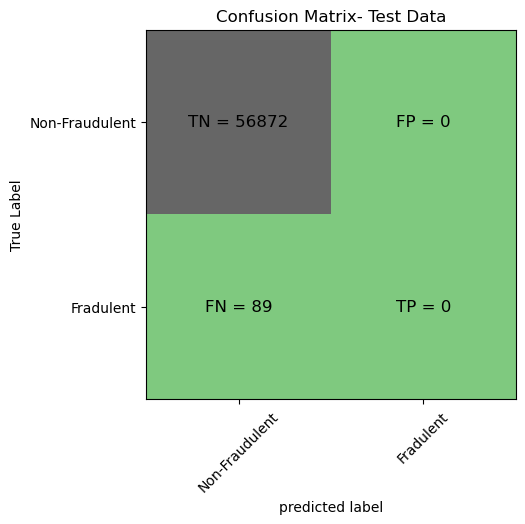

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.00      0.00      0.00        89

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

The accuracy of the model with L1 Regularization: 0.9992099857797441
Confusion Matrix


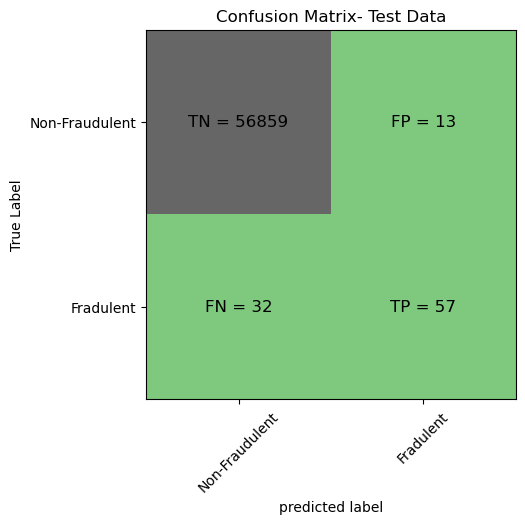

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.81      0.64      0.72        89

    accuracy                           1.00     56961
   macro avg       0.91      0.82      0.86     56961
weighted avg       1.00      1.00      1.00     56961

The l2_ROC_AUC: 0.5621207726872567
l2 threshold: 0.49933790839176184
roc for the test dataset is: 56.2%


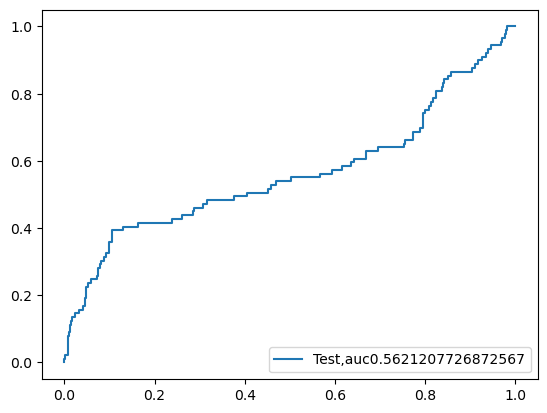

The l1_ROC_AUC: 0.9149035247296906
l1 threshold: 0.11608297876617071
roc for the test dataset is: 91.5%


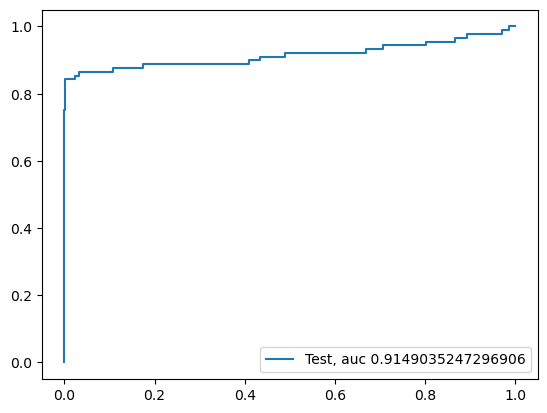

Time taken by model:--31.171504020690918---
------------------------------------------------------------
KNN model
Model Score
0.999490879724724
Confusion Matrix


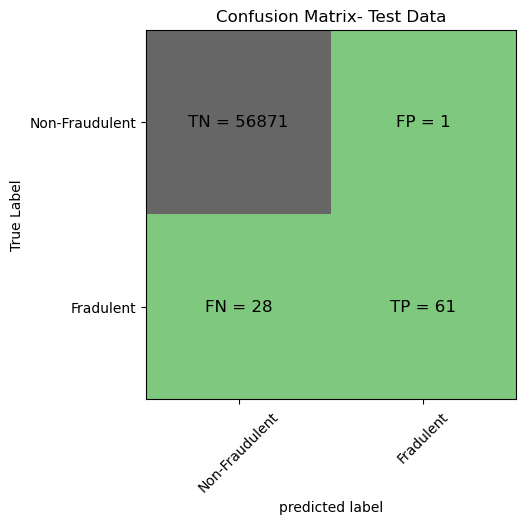

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.98      0.69      0.81        89

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.915584829959175
KNN threshold: 0.2
ROC for the test dataset 91.6%


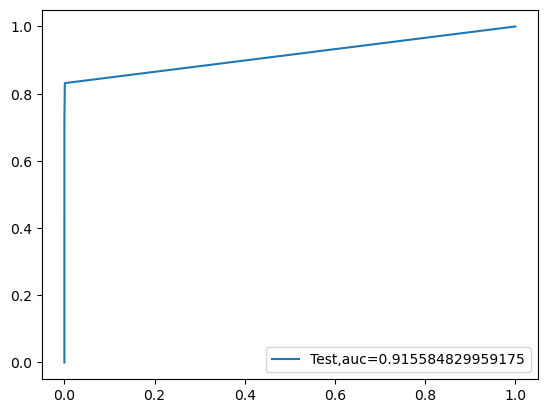

Time taken by model:--18.31709384918213---
------------------------------------------------------------
Decision Tree model with Gini and  Entropy Criteria
gini score: 0.9993153210091115
Confusion Matrix


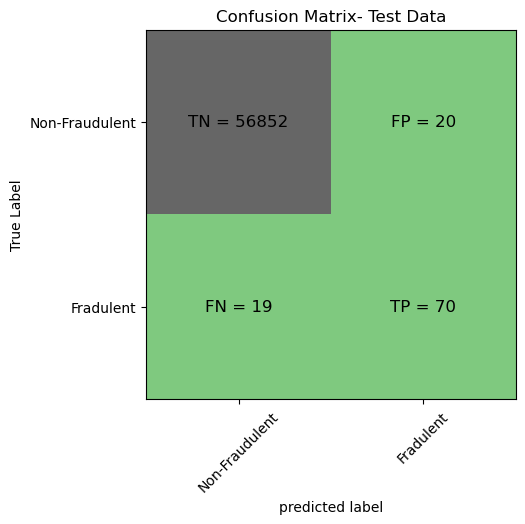

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.78      0.79      0.78        89

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

gini tree roc value: 0.8930825935157366


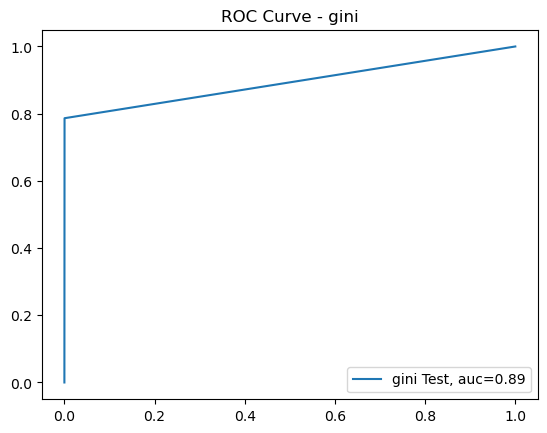

entropy score: 0.9992977651375503
Confusion Matrix


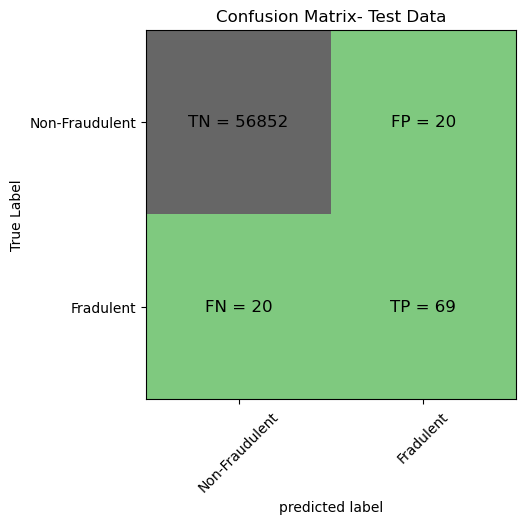

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.78      0.78      0.78        89

    accuracy                           1.00     56961
   macro avg       0.89      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree roc value: 0.8874646159876466


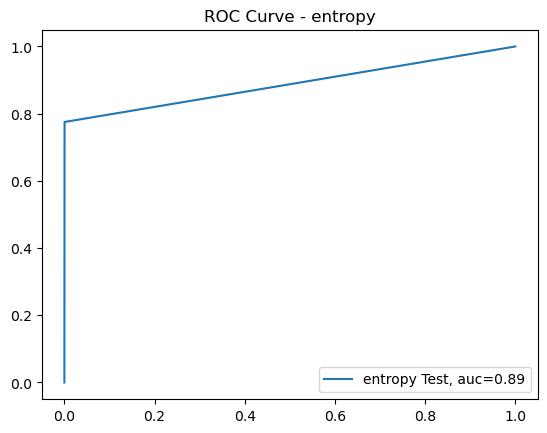

Time taken by model:--17.933226823806763---
------------------------------------------------------------
Random Forest model with Gini and  Entropy Criteria
Model Accuracy: 0.9996839943118976
Confusion Matrix


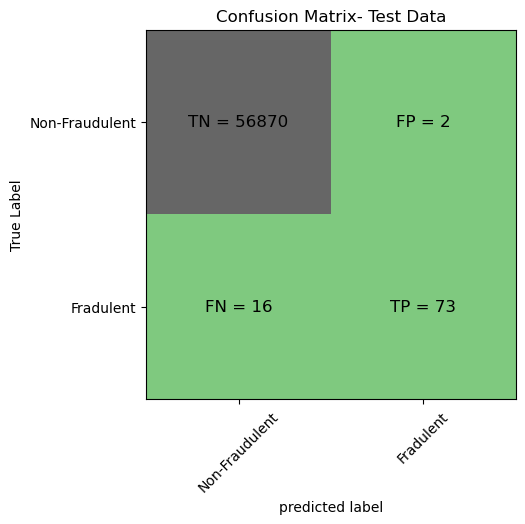

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.97      0.82      0.89        89

    accuracy                           1.00     56961
   macro avg       0.99      0.91      0.95     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9534394010757055
Random Forest Threshold: 0.01
ROC of the test dataset is 95.3%


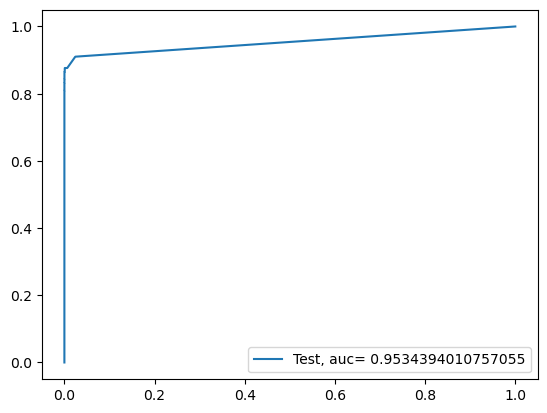

Time taken by model:--112.69438910484314---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9996664384403364
confusion Matrix


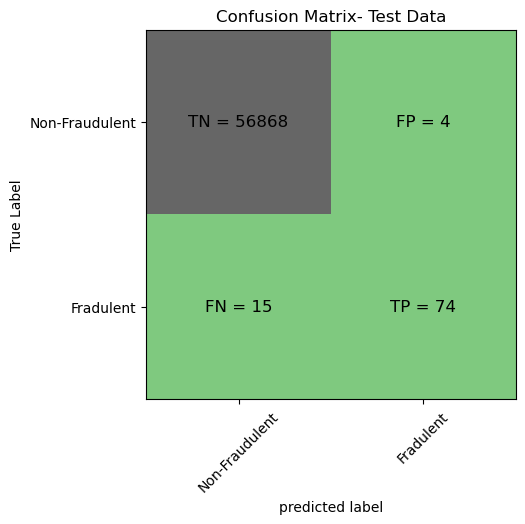

Classfication Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.95      0.83      0.89        89

    accuracy                           1.00     56961
   macro avg       0.97      0.92      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9763594889213072
XGBoost threshold: 7.196113438112661e-05
ROC for the test dataset 97.6%


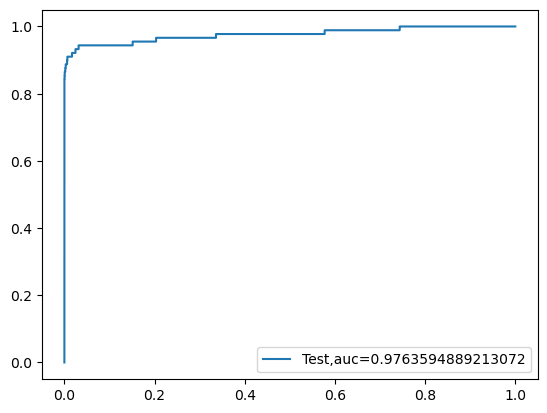

Time taken by model:--0.7541780471801758---
------------------------------------------------------------
SVM Model
accuracy score: 0.9984550833026106
confusion Matrix


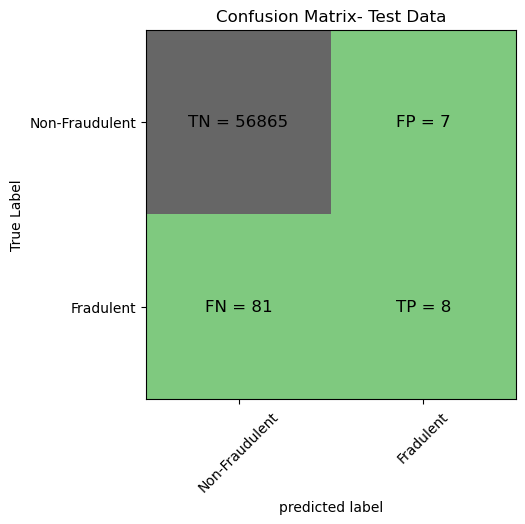

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.53      0.09      0.15        89

    accuracy                           1.00     56961
   macro avg       0.77      0.54      0.58     56961
weighted avg       1.00      1.00      1.00     56961

SVM ROC value: 0.5288208806371414
Threshold: 0.004774815714276056
ROC for the test dataset 52.9%


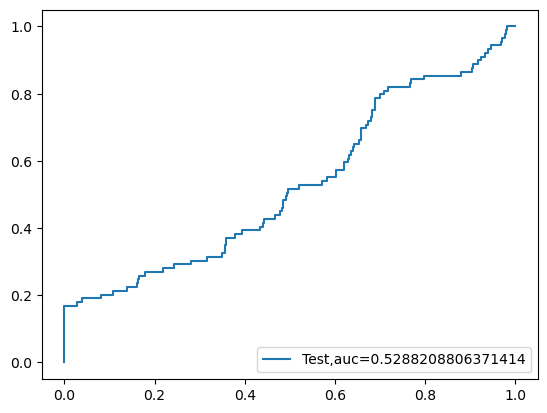

Time taken by model:--56.43583583831787---
------------------------------------------------------------


In [83]:
#lets run the Logistic Regression with L1 and L2 Regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"RepeatedKFold cross validation",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running KNN model
print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"Run KNN Models",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)


#running Decision Tree model
print("Decision Tree model with Gini and  Entropy Criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"Run Tree Models",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running Random Forest model
print("Random Forest model with Gini and  Entropy Criteria")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"Run Random Forest Models",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running XGBoost model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"Run XGBoost Models",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running SVM model
print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"Run SVM Models",X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)






In [87]:
df_Results

,Methodology,Model,Accuracy,roc_value,Threshold
0,RepeatedKFold cross validation,Logistic Regression With L2 Regularization,0.998438,0.562121,0.499338
1,RepeatedKFold cross validation,Logistic Regression With L1 Regularization,0.99921,0.914904,0.116083
2,Run KNN Models,KNN,0.999491,0.915585,0.200000
3,Run Tree Models,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.893083,1.000000
4,Run Tree Models,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.887465,1.000000
5,Run Random Forest Models,Random Forest Model,0.999684,0.953439,0.010000
6,Run XGBoost Models,XGBoost Model,0.999666,0.976359,0.000072
7,Run SVM Models,Random Forest Model,0.998455,0.528821,0.004794
8,Decision Tree with Gini and Entropy,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.893083,1.000000
9,Decision Tree with Gini and Entropy,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.887465,1.000000


In [89]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=None)
for train_index,test_index in skf.split(X,y):
    print("TRAIN: ",train_index,"TEST: ",test_index)
    X_train_skf_cv,X_test_skf_cv = X.iloc[train_index],X.iloc[test_index]
    y_train_skf_cv,y_test_skf_cv = y.iloc[train_index],y.iloc[test_index]

TRAIN:  [ 30473  30496  31002 ... 284804 284805 284806] TEST:  [    0     1     2 ... 57017 57018 57019]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN:  [     0      1      2 ... 284804 284805 284806] TEST:  [150654 150660 150661 ... 227866 227867 227868]
TRAIN:  [     0      1      2 ... 227866 227867 227868] TEST:  [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 Regularization
Max auc,roc for l1: 0.9652106893977332
Max auc,roc for l2: 0.5597020083683936
Parameter for L1 Regularization
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.94481541

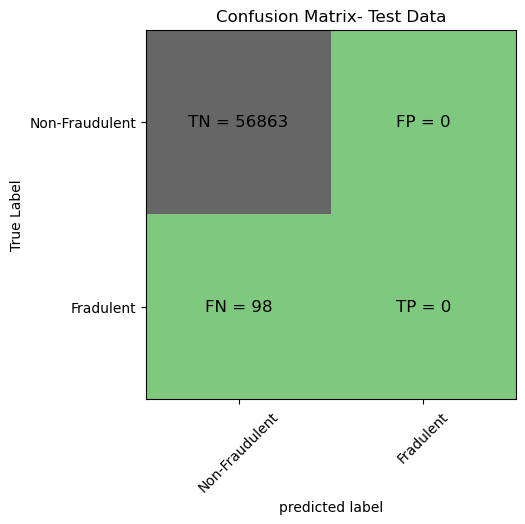

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

The accuracy of the model with L1 Regularization: 0.9987535331191517
Confusion Matrix


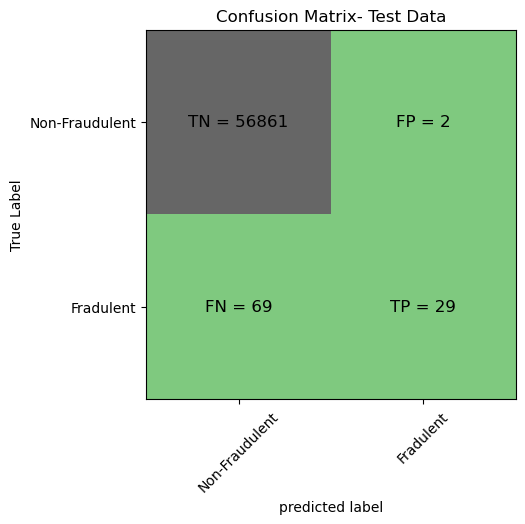

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

The l2_ROC_AUC: 0.6111619154810686
l2 threshold: 0.4993921957728672
roc for the test dataset is: 61.1%


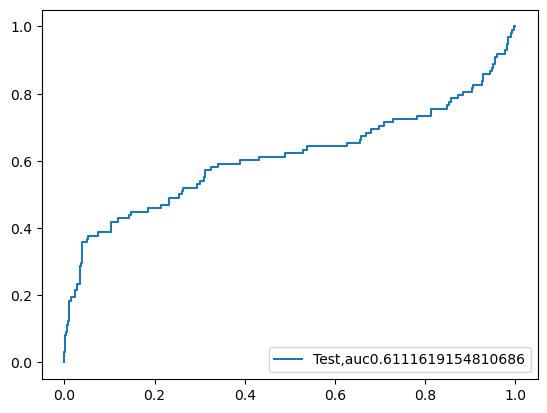

The l1_ROC_AUC: 0.8890758561483437
l1 threshold: 0.021087492766199784
roc for the test dataset is: 88.9%


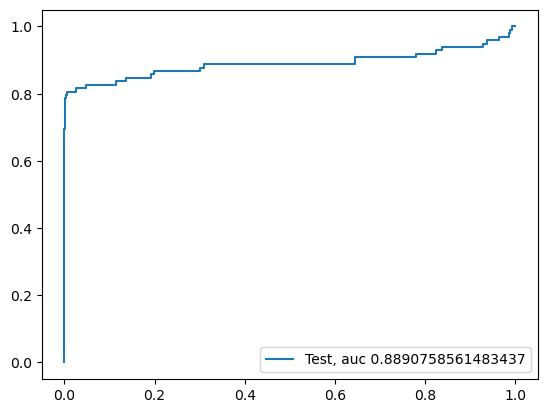

Time taken by model:--31.13391613960266---
------------------------------------------------------------
KNN model
Model Score
0.9991924299081828
Confusion Matrix


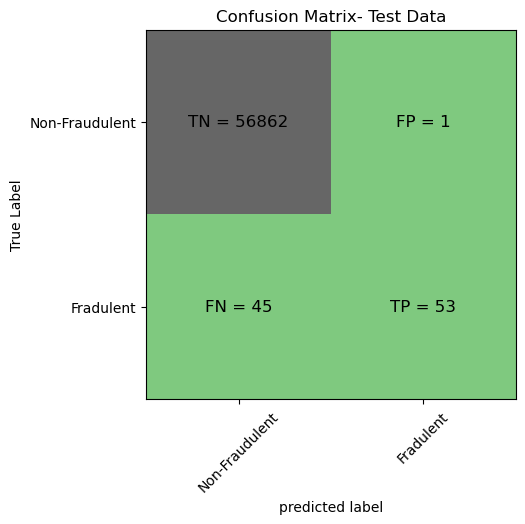

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8057457828285457
KNN threshold: 0.2
ROC for the test dataset 80.6%


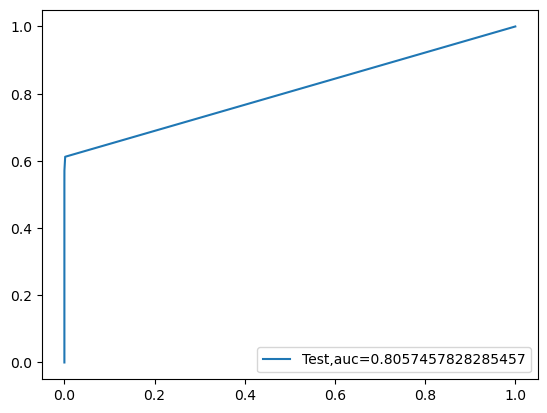

Time taken by model:--19.137413024902344---
------------------------------------------------------------
Decision Tree model with Gini and  Entropy Criteria
gini score: 0.998841312476958
Confusion Matrix


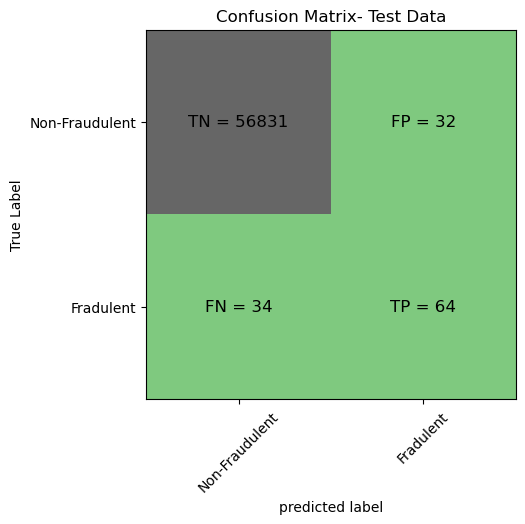

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree roc value: 0.8262492341959029


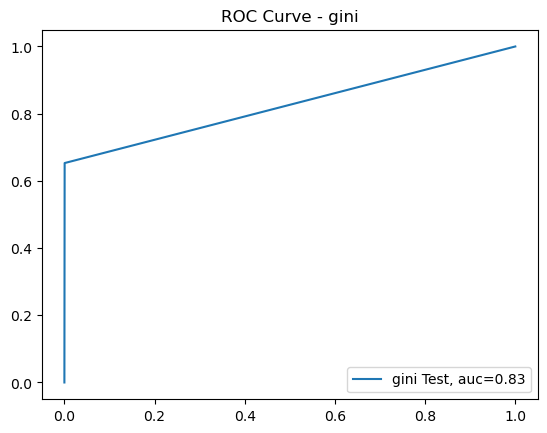

entropy score: 0.9990168711925703
Confusion Matrix


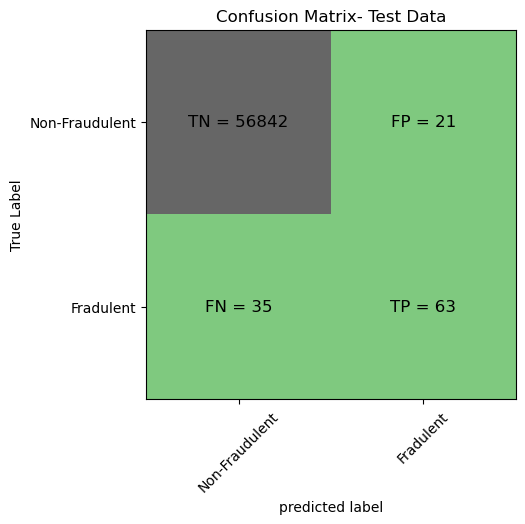

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.75      0.64      0.69        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.85     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree roc value: 0.8212439170839185


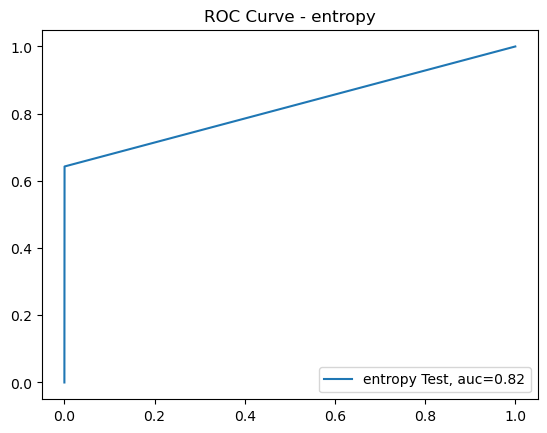

Time taken by model:--16.978893995285034---
------------------------------------------------------------
Random Forest model with Gini and  Entropy Criteria
Model Accuracy: 0.9994382121100402
Confusion Matrix


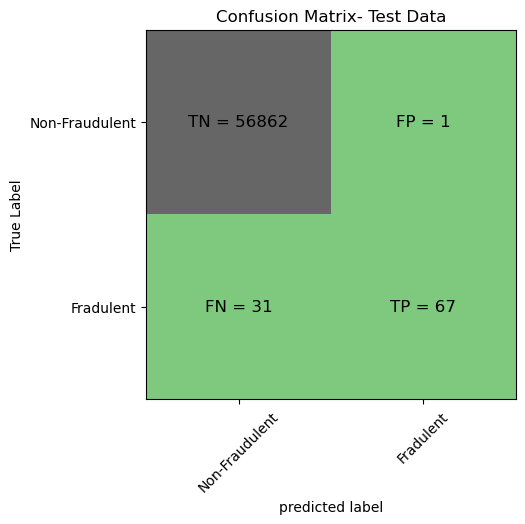

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9464721329855826
Random Forest Threshold: 0.01
ROC of the test dataset is 94.6%


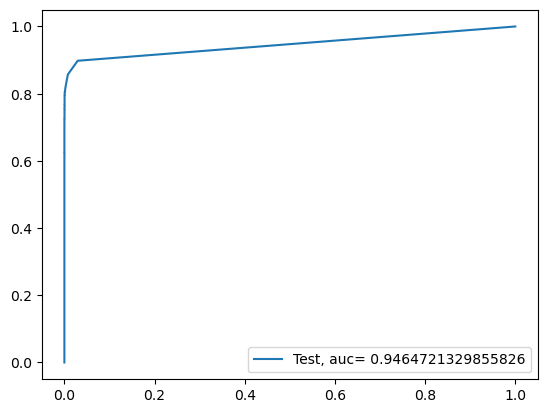

Time taken by model:--106.3757758140564---
------------------------------------------------------------
XGBoost Model
Model Accuracy: 0.9994382121100402
confusion Matrix


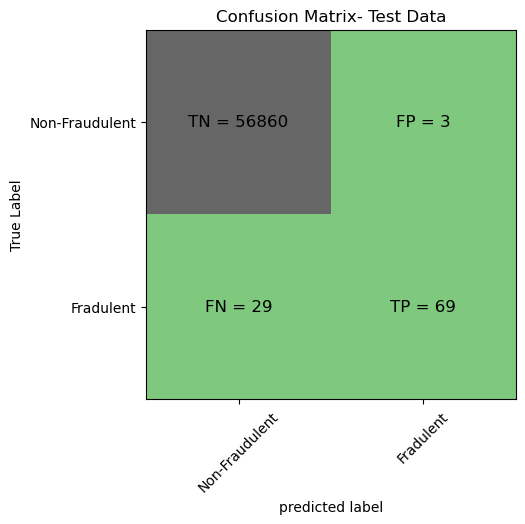

Classfication Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.972204945147431
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


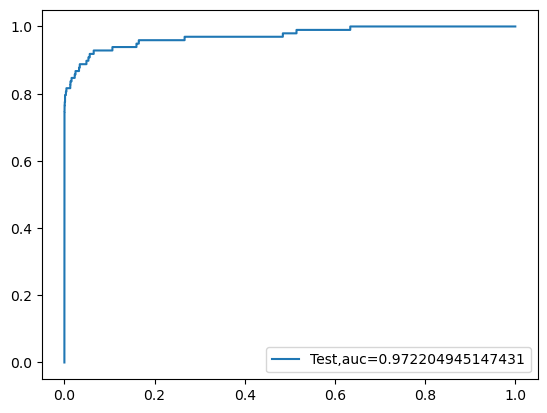

Time taken by model:--0.7462508678436279---
------------------------------------------------------------
SVM Model
accuracy score: 0.9982795245869981
confusion Matrix


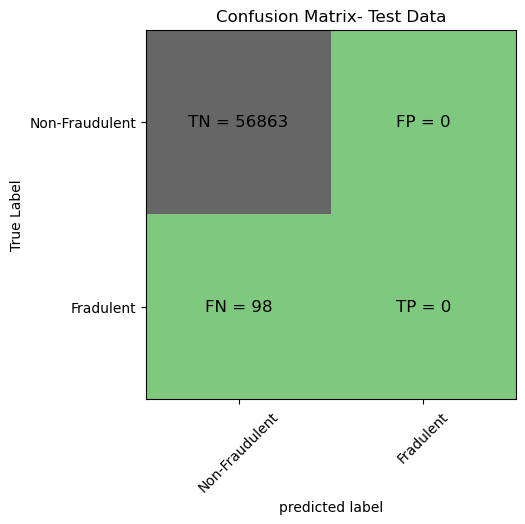

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM ROC value: 0.40177034885494567
Threshold: 0.002332037056665907
ROC for the test dataset 40.2%


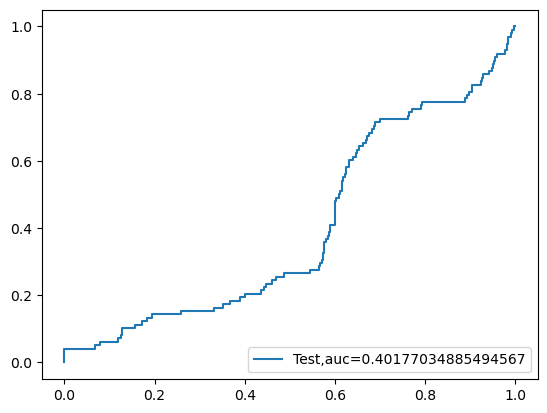

Time taken by model:--3825.6518239974976---
------------------------------------------------------------


In [91]:
#lets run the Logistic Regression with L1 and L2 Regularization
print("Logistic Regression with L1 and L2 Regularization")
start_time = time.time()
df_Results = buildAndRunLogisticModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running KNN model
print("KNN model")
start_time = time.time()
df_Results = buildAndRunKNNModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)


#running Decision Tree model
print("Decision Tree model with Gini and  Entropy Criteria")
start_time = time.time()
df_Results = buildAndRunTreeModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running Random Forest model
print("Random Forest model with Gini and  Entropy Criteria")
start_time = time.time()
df_Results = buildAndRunRandomForestModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running XGBoost model
print("XGBoost Model")
start_time = time.time()
df_Results = buildAndRunXGBoostModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)

#running SVM model
print("SVM Model")
start_time = time.time()
df_Results = buildAndRunSVMModels(df_Results,"StratifiedKFold cross validation",X_train_skf_cv,y_train_skf_cv,X_test_skf_cv,y_test_skf_cv)
print("Time taken by model:--%s---"%(time.time() - start_time))
print('-'*60)






In [93]:
df_Results

,Methodology,Model,Accuracy,roc_value,Threshold
0,RepeatedKFold cross validation,Logistic Regression With L2 Regularization,0.998438,0.562121,0.499338
1,RepeatedKFold cross validation,Logistic Regression With L1 Regularization,0.99921,0.914904,0.116083
2,Run KNN Models,KNN,0.999491,0.915585,0.200000
3,Run Tree Models,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.893083,1.000000
4,Run Tree Models,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.887465,1.000000
5,Run Random Forest Models,Random Forest Model,0.999684,0.953439,0.010000
6,Run XGBoost Models,XGBoost Model,0.999666,0.976359,0.000072
7,Run SVM Models,Random Forest Model,0.998455,0.528821,0.004794
8,Decision Tree with Gini and Entropy,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.893083,1.000000
9,Decision Tree with Gini and Entropy,Tree Model,"{'gini': 0.9993153210091115, 'entropy': 0.9992...",0.887465,1.000000
